In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import numpy as np

label_size = 12
plt.rcParams['axes.labelsize'] = label_size
plt.rcParams['figure.dpi'] = 300

In [224]:
edge_df = pd.read_csv('../data/edge_importance_df.csv')
no_ews_edge_df = pd.read_csv('../data/no_ews_edge_importance_df.csv')

### Plot Distributions

In [225]:
edge_df['Weights'] = 'Exp EWs'
no_ews_edge_df['Weights'] = 'No EWs'

In [226]:
full_edge_df = pd.concat([edge_df, no_ews_edge_df])
# full_edge_df = full_edge_df[full_edge_df['Importance'] != 0].reset_index(drop=True)
full_edge_df

,Edge,Importance,Weights
0,"(0, 1)",0.276764,Exp EWs
1,"(0, 2)",0.279708,Exp EWs
2,"(0, 39)",0.277705,Exp EWs
3,"(0, 40)",0.274126,Exp EWs
4,"(0, 41)",0.288583,Exp EWs
...,...,...,...
6251,"(53, 107)",0.269839,No EWs
6252,"(56, 107)",0.282539,No EWs
6253,"(107, 51)",0.297849,No EWs
6254,"(107, 53)",0.303374,No EWs


### Edge importance distributions

Text(0, 0.5, 'Density')

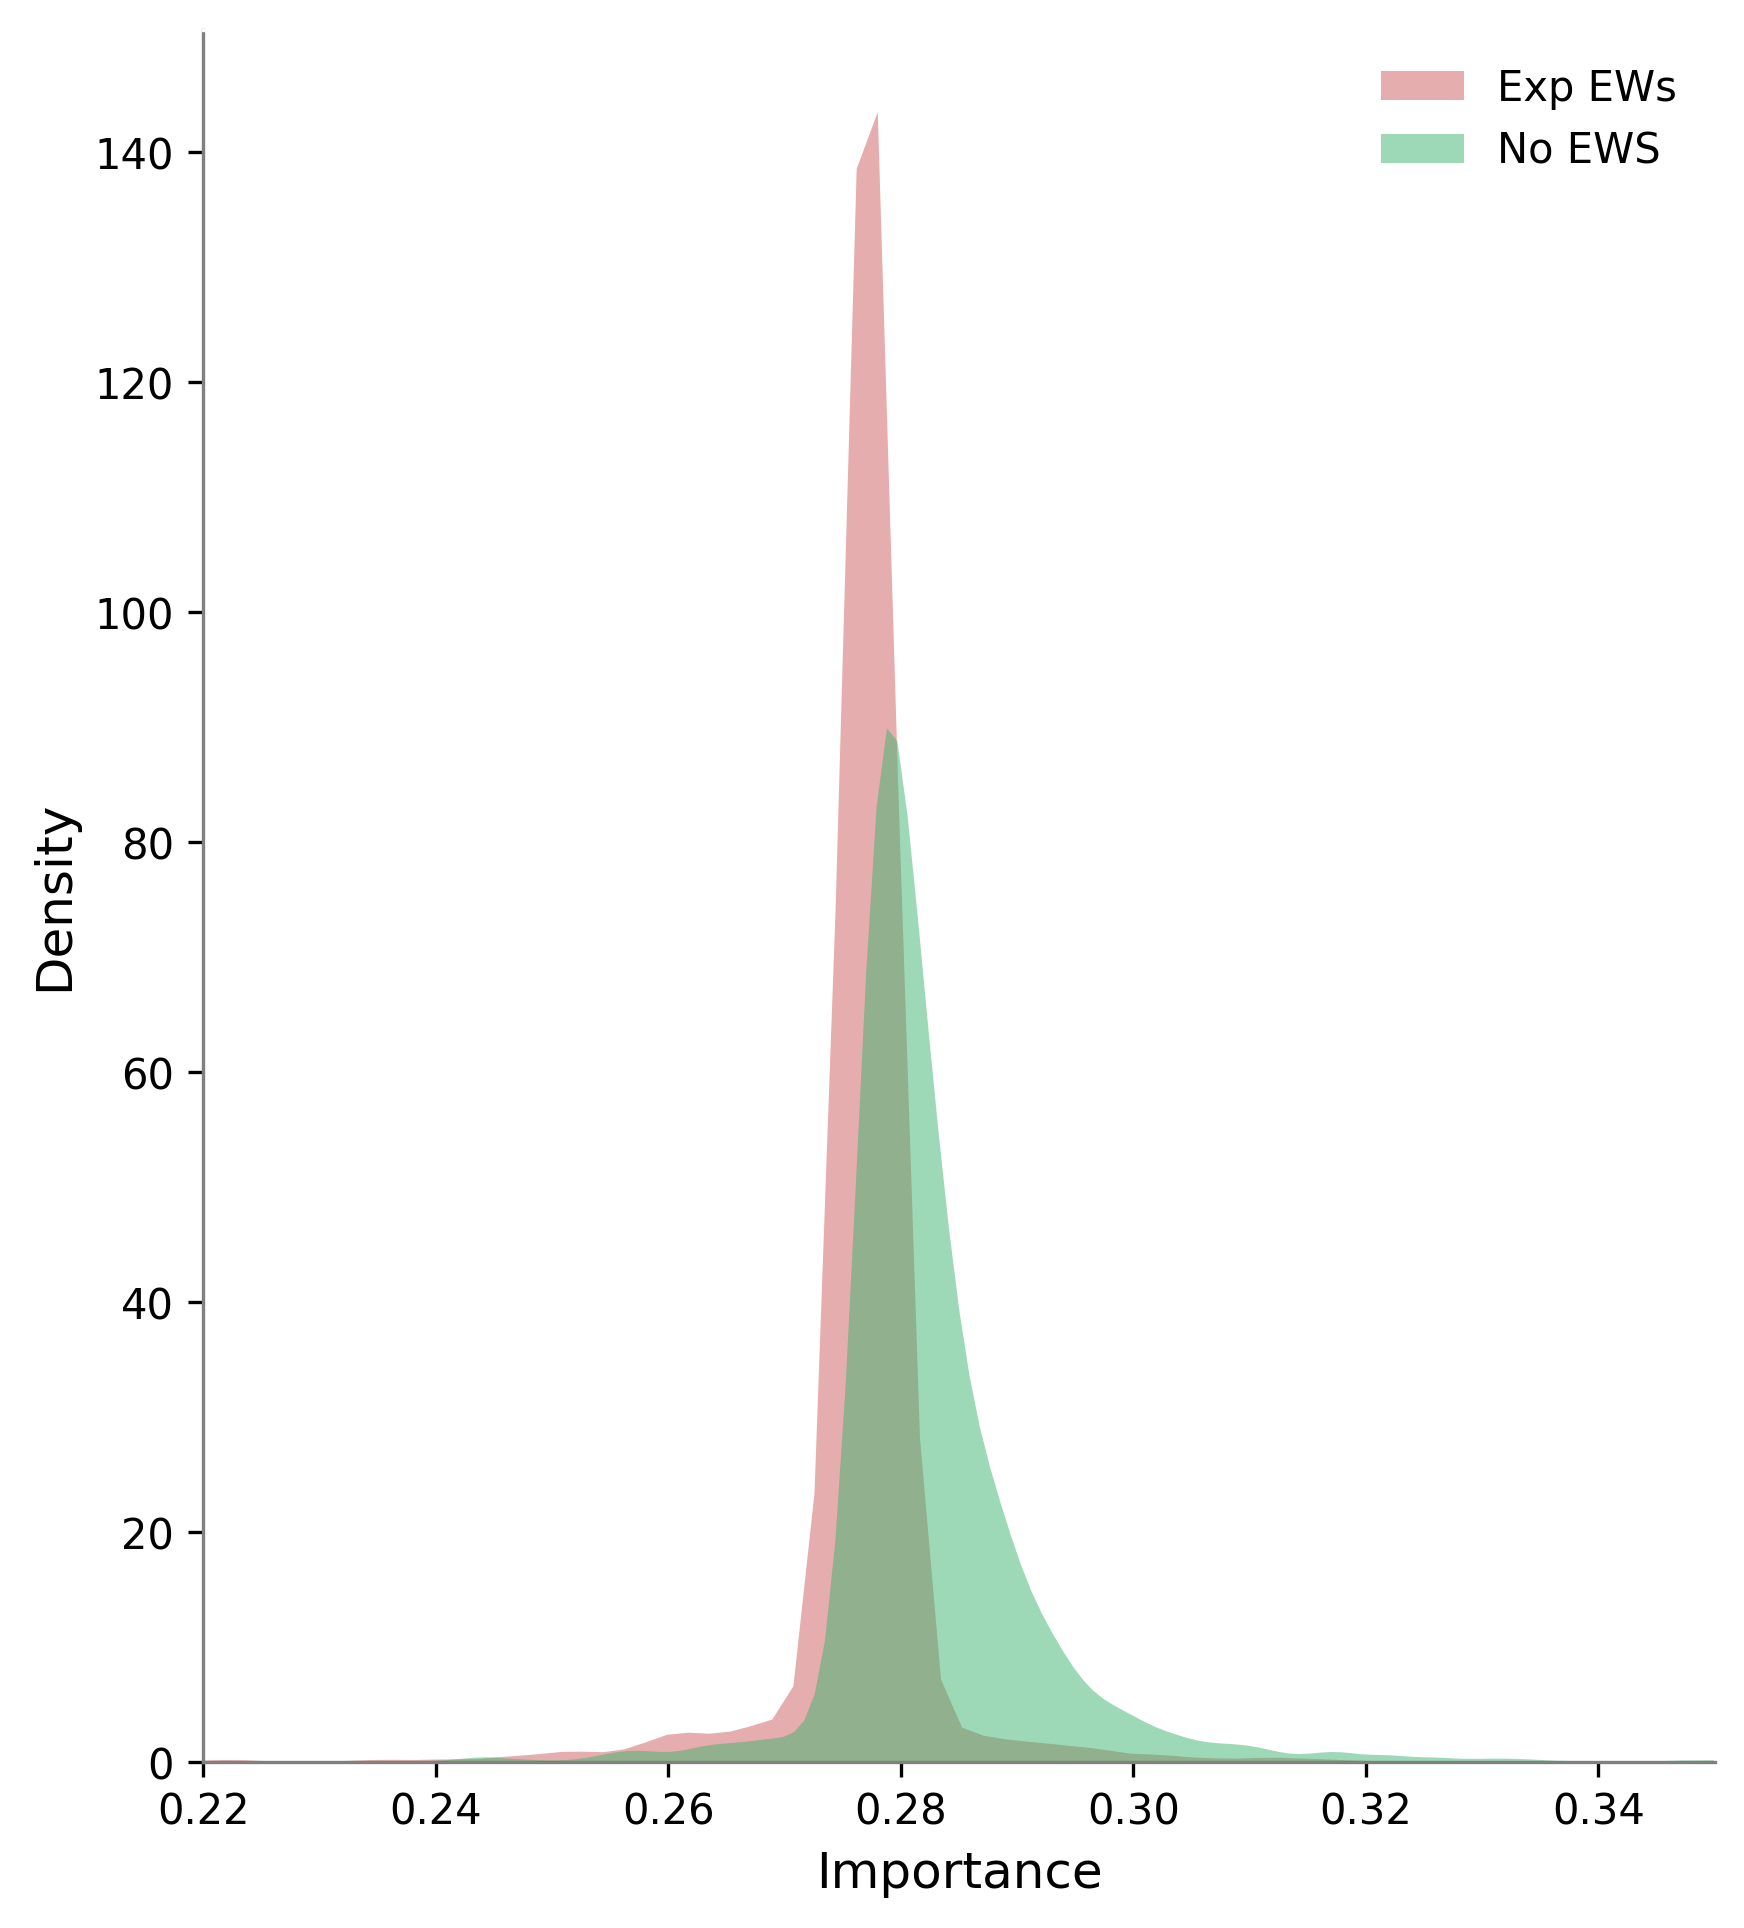

In [227]:
from matplotlib.patches import Patch

data = full_edge_df[['Weights', 'Importance']]

fig, ax = plt.subplots(figsize=(6.5, 7.5))

sns.kdeplot(data[data['Weights'] == 'Exp EWs']['Importance'], color='indianred', label='Exp EWs', fill=True, linewidth=0, alpha=0.5)
sns.kdeplot(data[data['Weights'] == 'No EWs']['Importance'], color='mediumseagreen', label='No EWS', fill=True, linewidth=0, alpha=0.5)


# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

legend = plt.legend(loc='upper right', frameon=False)

plt.xlim(0.22, 0.35)
plt.xlabel('Importance')
plt.ylabel('Density')

In [232]:
from scipy.stats import ttest_rel, wilcoxon

# x and y are paired samples
# ttest_rel(data[data['Weights'] == 'Exp EWs']['Importance'], data[data['Weights'] == 'No EWs']['Importance'])
s, p = wilcoxon(data[data['Weights'] == 'Exp EWs']['Importance'], data[data['Weights'] == 'No EWs']['Importance'])
s, p

(2236703.0, 0.0)

In [46]:
import pingouin as pg

pg.compute_effsize(data[data['Weights'] == 'Exp EWs']['Importance'], data[data['Weights'] == 'No EWs']['Importance'], eftype='cohen')

-0.6376596514130966

### Heatmaps

In [97]:
# import seaborn as sns
# import ast

# no_ews = full_edge_df[full_edge_df['Weights'] == 'No EWs'][['Edge', 'Importance']]
# ews = full_edge_df[full_edge_df['Weights'] == 'Exp EWs'][['Edge', 'Importance']]

# # Ensure Edge column contains tuples, not strings
# def ensure_tuple(edge):
#     if isinstance(edge, str):
#         return ast.literal_eval(edge)
#     return edge

# no_ews['Edge'] = no_ews['Edge'].apply(ensure_tuple)
# ews['Edge'] = ews['Edge'].apply(ensure_tuple)

# # Prepare matrices for both datasets
# def edge_to_matrix(edge_df):
#     nodes_x = sorted(set([e[0] for e in edge_df['Edge']]))
#     nodes_y = sorted(set([e[1] for e in edge_df['Edge']]))
#     matrix = pd.DataFrame(
#         0, 
#         index=nodes_y, 
#         columns=nodes_x
#     )
#     for idx, row in edge_df.iterrows():
#         x, y = row['Edge']
#         matrix.at[y, x] = row['Importance']
#     return matrix

# matrix_ews = edge_to_matrix(ews)
# matrix_no_ews = edge_to_matrix(no_ews)

# fig, axes = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.05})

# # Common color limits
# vmin, vmax = 0.27, 0.29

# # EWS heatmap (left)
# sns.heatmap(matrix_ews, cmap='YlOrBr', ax=axes[0], cbar=False, vmin=vmin, vmax=vmax,
#             yticklabels=True, xticklabels=False)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Target Node Index')
# axes[0].set_yticks(np.arange(len(matrix_ews.index), step=4)) 
# axes[0].set_yticklabels(np.arange(len(matrix_ews.index), step=4), rotation=0) 

# # No EWS heatmap (right)
# sns.heatmap(matrix_no_ews, cmap='YlOrBr', ax=axes[1], cbar=True, vmin=vmin, vmax=vmax,
#             yticklabels=False, xticklabels=True, cbar_ax=fig.add_axes([0.92, 0.125, 0.02, 0.75]))

# axes[1].set_xlabel('Source Node Index')
# axes[1].set_xticks(np.arange(len(matrix_ews.index), step=4)) 
# axes[1].set_xticklabels(np.arange(len(matrix_ews.index), step=4), rotation=90) 

# plt.tight_layout(rect=[0, 0, 0.9, 1])
# plt.show()

In [ ]:
edge_weight_df = pd.read_csv('../data/edge_weight_df.csv')

In [130]:
import ast

edge_weight_df['Edge'] = edge_weight_df['Edge'].apply(ast.literal_eval)
edge_weight_df

,Edge,Weight
0,"(0, 1)",7.448223e-05
1,"(0, 2)",7.500190e-04
2,"(0, 39)",4.846348e-06
3,"(0, 40)",1.965541e-06
4,"(0, 41)",9.288905e-01
...,...,...
6251,"(53, 107)",1.256869e-07
6252,"(56, 107)",2.572807e-08
6253,"(107, 51)",1.014563e-07
6254,"(107, 53)",1.256869e-07


In [131]:
matrix = pd.DataFrame(
    0, 
    index=sorted(set([e[1] for e in edge_weight_df['Edge']])), 
    columns=sorted(set([e[0] for e in edge_weight_df['Edge']]))
)
for idx, row in edge_weight_df.iterrows():
    x, y = row['Edge']
    matrix.at[y, x] = np.log(row['Weight'] + 1e-8)

matrix = matrix.replace(0, -100)

/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/749001694.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.504815682134879' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  matrix.at[y, x] = np.log(row['Weight'] + 1e-8)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/749001694.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.504815682134879' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  matrix.at[y, x] = np.log(row['Weight'] + 1e-8)
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/749001694.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.195398633169879' has dtype incompatible with int64, ple

/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/3209321574.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0004138205200433509' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  matrix.at[y, x] = row['Importance']
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/3209321574.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0006979251652955432' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  matrix.at[y, x] = row['Importance']
/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_45765/3209321574.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.455080747603704e-05' has dtype incompatible with int64, please e

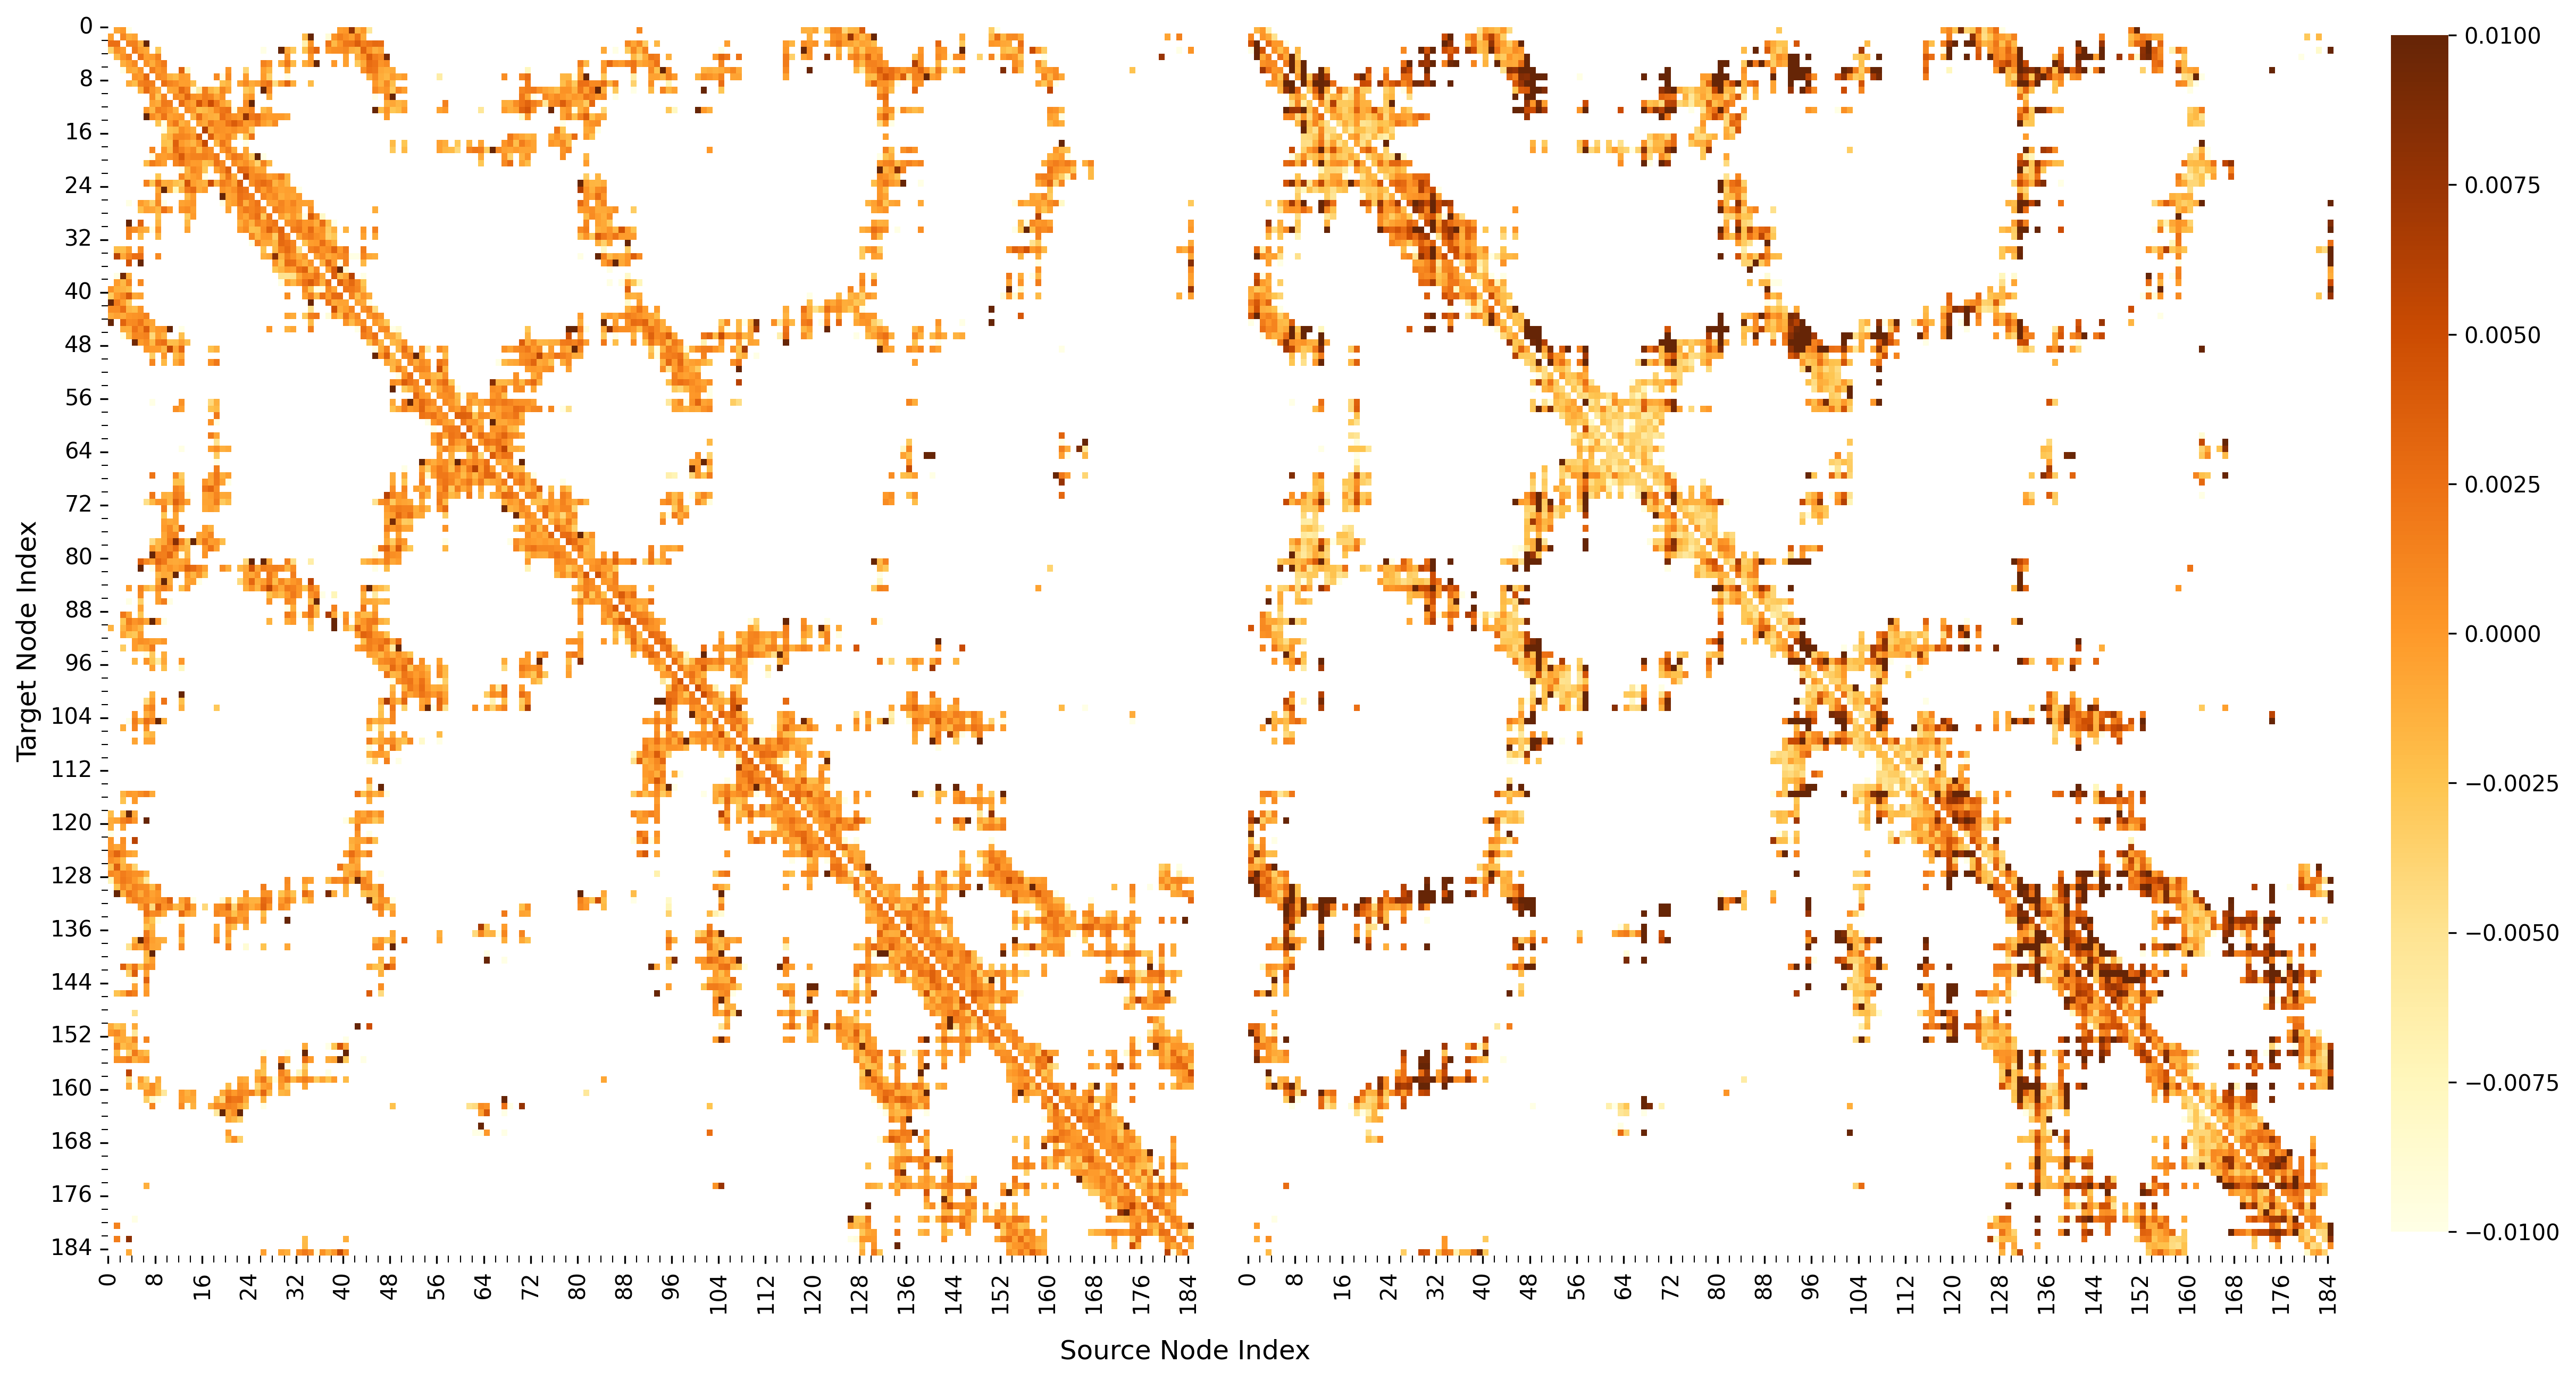

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

# --- Extract edges ---
no_ews = full_edge_df[full_edge_df['Weights'] == 'No EWs'][['Edge', 'Importance']]
ews = full_edge_df[full_edge_df['Weights'] == 'Exp EWs'][['Edge', 'Importance']]

# Ensure Edge column contains tuples
def ensure_tuple(edge):
    if isinstance(edge, str):
        return ast.literal_eval(edge)
    return edge

no_ews['Edge'] = no_ews['Edge'].apply(ensure_tuple)
ews['Edge'] = ews['Edge'].apply(ensure_tuple)

# centre importance values around 0
no_ews_centered = no_ews.copy()
ews_centered = ews.copy()
no_ews_centered['Importance'] = no_ews['Importance'] - no_ews['Importance'].median()
ews_centered['Importance'] = ews['Importance'] - ews['Importance'].median()

# --- Convert to matrix ---
def edge_to_matrix(edge_df):
    nodes_x = sorted(set([e[0] for e in edge_df['Edge']]))
    nodes_y = sorted(set([e[1] for e in edge_df['Edge']]))
    matrix = pd.DataFrame(
        0, 
        index=nodes_y, 
        columns=nodes_x
    )
    for idx, row in edge_df.iterrows():
        x, y = row['Edge']
        matrix.at[y, x] = row['Importance']
    return matrix

# matrix_ews = edge_to_matrix(ews)
# matrix_no_ews = edge_to_matrix(no_ews)
matrix_ews = edge_to_matrix(ews_centered)
matrix_no_ews = edge_to_matrix(no_ews_centered)

# --- Set 0 to np.nan so we can color them white ---
matrix_ews_plot = matrix_ews.replace(0, np.nan)
matrix_no_ews_plot = matrix_no_ews.replace(0, np.nan)

# --- Colormap with white for NaNs (bad values) ---
cmap = plt.cm.get_cmap('YlOrBr').copy()
cmap.set_bad(color='white')

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.05})

# vmin, vmax = 0.27, 0.29
# # centred around respective medians
# vmin1, vmax1 = 0.277178 - 0.01 , 0.277178 + 0.01
# vmin2, vmax2 = 0.280805 - 0.01 , 0.280805 + 0.01
# # centre around means
# vmin1, vmax1 = 0.276738 - 0.01 , 0.276738 + 0.01
# vmin2, vmax2 = 0.282751 - 0.01 , 0.282751 + 0.01
# centred around 0
vmin1, vmax1 = -0.01, 0.01 
vmin2, vmax2 = vmin1, vmax1  
tick_step = 8

# Left: EWS
sns.heatmap(matrix_ews_plot, cmap=cmap, ax=axes[0], cbar=False, vmin=vmin1, vmax=vmax1,
            yticklabels=True, xticklabels=False)
axes[0].set_xlabel('')
axes[0].set_xticks(np.arange(0, len(matrix_ews_plot.columns), step=tick_step))
axes[0].set_xticklabels(np.arange(0, len(matrix_ews_plot.columns), step=tick_step), rotation=90)

# Add minor ticks
axes[0].minorticks_on()
axes[0].tick_params(axis='x', which='minor', length=3, width=0.5)
axes[0].tick_params(axis='y', which='minor', length=3, width=0.5)

axes[0].set_xticklabels(np.arange(0, len(matrix_ews_plot.columns), step=tick_step), rotation=90)
axes[0].set_ylabel('Target Node Index')
axes[0].set_yticks(np.arange(0, len(matrix_ews_plot.index), step=tick_step)) 
axes[0].set_yticklabels(np.arange(0, len(matrix_ews_plot.index), step=tick_step), rotation=0) 

# Right: No EWS
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.75])
sns.heatmap(matrix_no_ews_plot, cmap=cmap, ax=axes[1], cbar=True, vmin=vmin2, vmax=vmax2,
            yticklabels=False, xticklabels=True, cbar_ax=cbar_ax)

axes[1].minorticks_on()
axes[1].tick_params(axis='x', which='minor', length=3, width=0.5)
axes[1].set_xticks(np.arange(0, len(matrix_no_ews_plot.columns), step=tick_step))
axes[1].set_xticklabels(np.arange(0, len(matrix_no_ews_plot.columns), step=tick_step), rotation=90)

# Remove individual x-labels
axes[0].set_xlabel('')
axes[1].set_xlabel('')

# Add a central x-label below both heatmaps
fig.text(0.5, 0.05, 'Source Node Index', ha='center', va='center', fontsize=label_size)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


In [191]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import ast

# # --- Extract edges ---
# no_ews = full_edge_df[full_edge_df['Weights'] == 'No EWs'][['Edge', 'Importance']]
# ews = full_edge_df[full_edge_df['Weights'] == 'Exp EWs'][['Edge', 'Importance']]

# # Ensure Edge column contains tuples
# def ensure_tuple(edge):
#     if isinstance(edge, str):
#         return ast.literal_eval(edge)
#     return edge

# no_ews['Edge'] = no_ews['Edge'].apply(ensure_tuple)
# ews['Edge'] = ews['Edge'].apply(ensure_tuple)

# # --- Convert to matrix ---
# def edge_to_matrix(edge_df):
#     nodes_x = sorted(set([e[0] for e in edge_df['Edge']]))
#     nodes_y = sorted(set([e[1] for e in edge_df['Edge']]))
#     matrix = pd.DataFrame(
#         0, 
#         index=nodes_y, 
#         columns=nodes_x
#     )
#     for idx, row in edge_df.iterrows():
#         x, y = row['Edge']
#         matrix.at[y, x] = row['Importance']
#     return matrix

# matrix_ews = edge_to_matrix(ews)
# matrix_no_ews = edge_to_matrix(no_ews)

# # Replace 0s with NaN to show white in heatmaps
# matrix_ews_plot = matrix_ews.replace(0, np.nan)
# matrix_no_ews_plot = matrix_no_ews.replace(0, np.nan)

# # --- Shared colormaps ---
# cmap_main = plt.cm.get_cmap('YlOrBr').copy()
# cmap_main.set_bad(color='white')

# # --- Setup 2x2 layout ---
# fig, axes = plt.subplots(2, 2, figsize=(18, 18), 
#                          gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1], 'wspace': 0.05, 'hspace': 0.15})

# vmin, vmax = 0.27, 0.29  # For EWS/No EWS

# # --- Top-left: EWS heatmap ---
# sns.heatmap(matrix_ews_plot, cmap=cmap_main, ax=axes[0, 0], cbar=False, vmin=vmin, vmax=vmax,
#             yticklabels=True, xticklabels=False)
# axes[0, 0].set_xlabel('')
# axes[0, 0].set_ylabel('Target Node Index')
# axes[0, 0].set_yticks(np.arange(0, len(matrix_ews_plot.index), step=4))
# axes[0, 0].set_yticklabels(np.arange(0, len(matrix_ews_plot.index), step=4), rotation=0)

# # --- Top-right: No EWS heatmap with colorbar ---
# cbar_ax = fig.add_axes([0.92, 0.56, 0.02, 0.33])  # Adjust for 2x2 layout
# sns.heatmap(matrix_no_ews_plot, cmap=cmap_main, ax=axes[0, 1], cbar=True, vmin=vmin, vmax=vmax,
#             yticklabels=False, xticklabels=True, cbar_ax=cbar_ax)
# axes[0, 1].set_xlabel('Source Node Index')
# axes[0, 1].set_xticks(np.arange(0, len(matrix_no_ews_plot.columns), step=4))
# axes[0, 1].set_xticklabels(np.arange(0, len(matrix_no_ews_plot.columns), step=4), rotation=90)

# # --- Third heatmap matrix (bottom-left) ---
# # Assume matrix is already defined
# matrix_plot = matrix.copy()
# matrix_plot = np.where(matrix_plot == -100, np.nan, matrix_plot)


# # Add colorbar for the bottom-left heatmap
# cbar_ax_bot = fig.add_axes([0.52, 0.12, 0.02, 0.33])  # Adjust position as needed
# sns.heatmap(matrix_plot, cmap=cmap_main, ax=axes[1, 0], cbar=True,
#             vmin=-18.2, 
#             # vmax=-0.07, 
#             vmax=-1.5, 
#             cbar_ax=cbar_ax_bot)

# axes[1, 0].set_xlabel('Source Node Index')
# axes[1, 0].set_ylabel('Target Node Index')

# # --- Bottom-right: Empty ---
# axes[1, 1].axis('off')

# # --- Final layout ---
# plt.tight_layout(rect=[0, 0, 0.9, 1])
# plt.show()


In [153]:
matrix_plot_df = pd.DataFrame(matrix_plot)
first_percentile = matrix_plot_df.stack().quantile(0.01)
first_percentile

-18.1954126148865

In [198]:
print('with edge weights')
display(ews.describe())
print(np.percentile(ews['Importance'], 10),',', np.percentile(ews['Importance'], 90))
print('without edge weights')
display(no_ews.describe())
print(np.percentile(no_ews['Importance'], 10),',', np.percentile(no_ews['Importance'], 90))

with edge weights


,Importance
count,6256.000000
mean,0.276738
std,0.009543
min,0.000000
25%,0.275926
50%,0.277178
75%,0.278457
max,0.351037


0.27440983619540926 , 0.27980943650007245
without edge weights


,Importance
count,6256.000000
mean,0.282751
std,0.009315
min,0.221564
25%,0.278243
50%,0.280805
75%,0.285221
max,0.388400


0.2765726554766297 , 0.2918421998062175


<Axes: xlabel='Importance', ylabel='Density'>

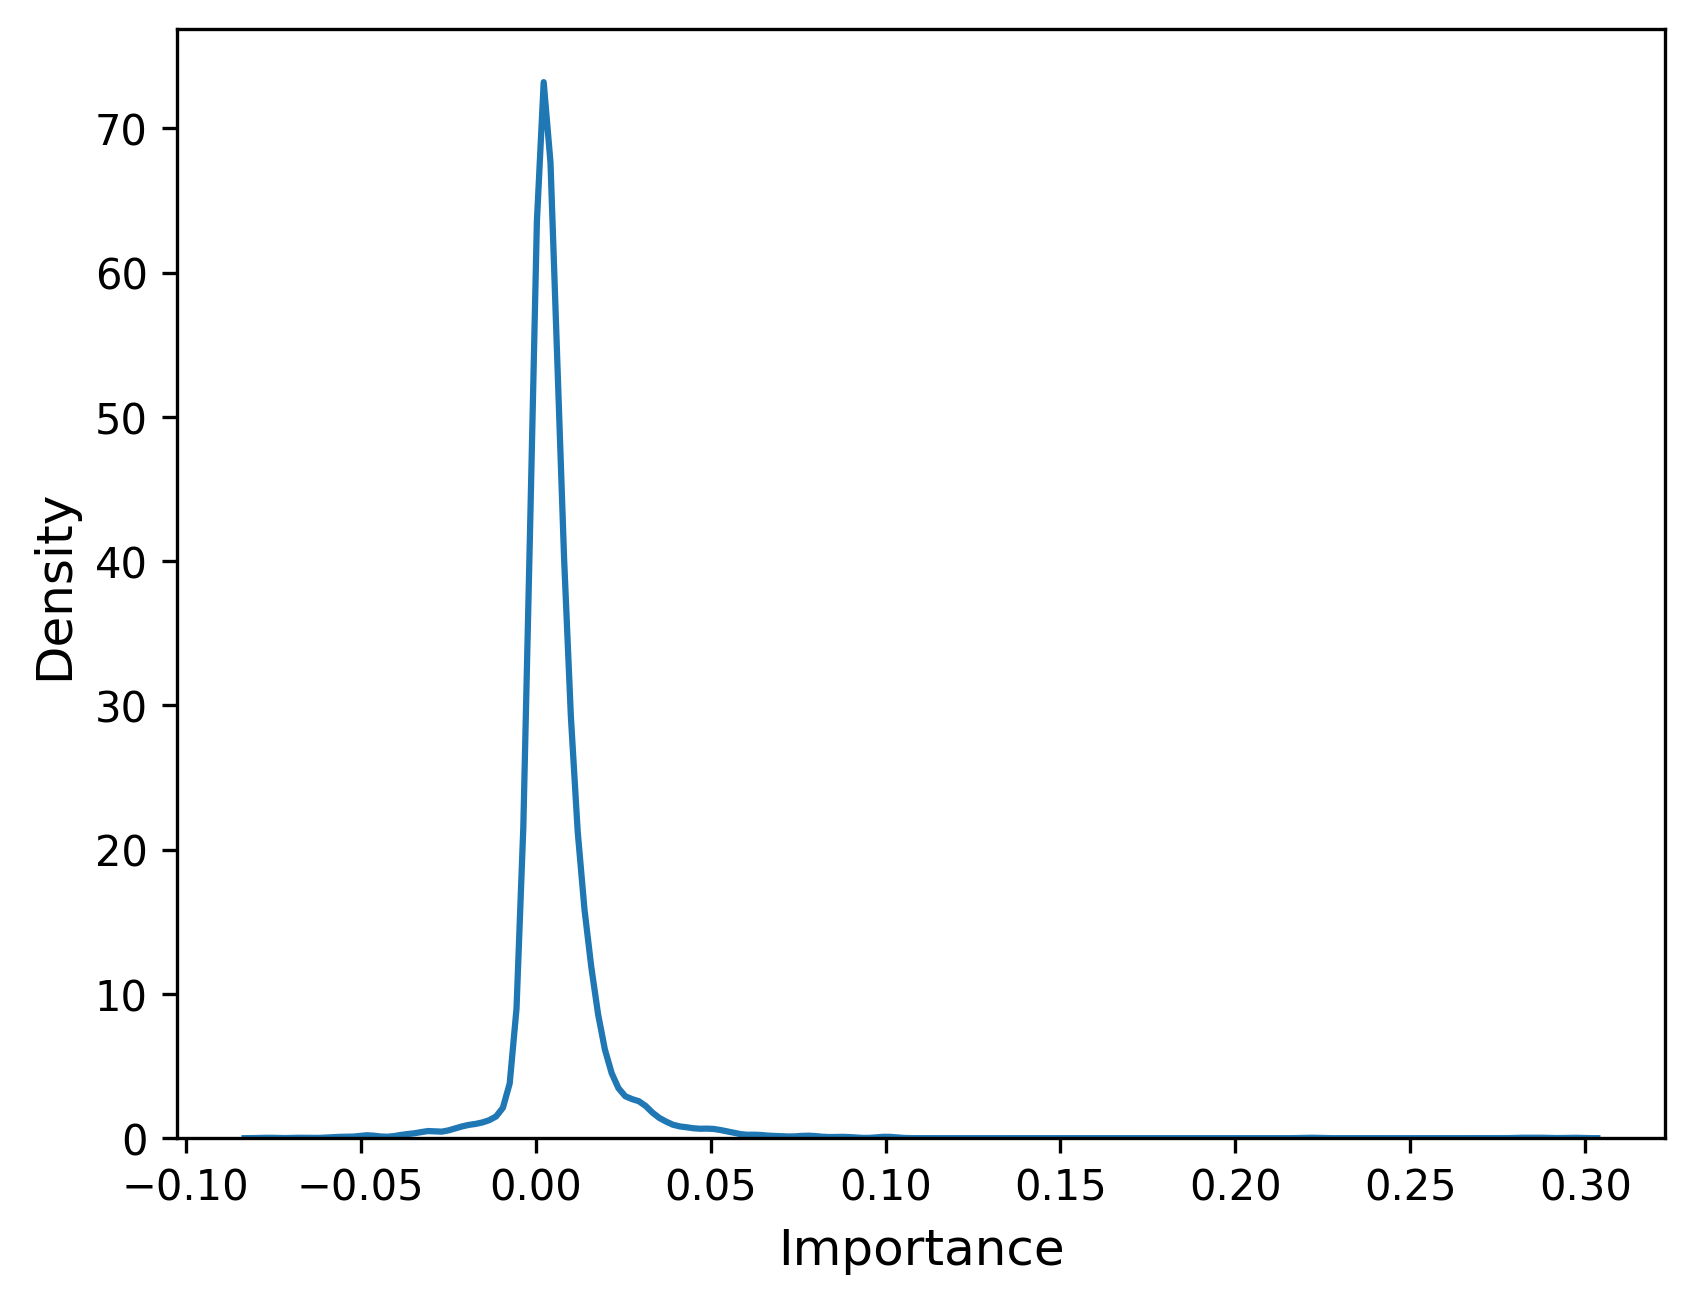

In [ ]:
data =  no_ews['Importance'] - ews['Importance']
sns.kdeplot(data)